In [1]:
from sklearn import model_selection, metrics, ensemble
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pylab as plt

In [2]:
biorespone = pd.read_csv('XGBOOST_DATA.csv', header = 0, sep=',')
biorespone.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
biorespone_target = biorespone.Activity.values
biorespone_data = biorespone.iloc[:,1:]

### Модель RandomForestClassifier

In [4]:
n_trees = [1] + list(range(10, 55, 5))

In [5]:
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators=n_tree, min_samples_split=5)
    score = model_selection.cross_val_score(estimator, biorespone_data, biorespone_target,
                                            cv=3, scoring='accuracy')
    scoring.append(score)

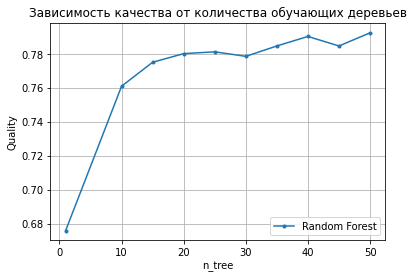

In [6]:
scoring = np.asmatrix(scoring)
scoring
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='Random Forest')
plt.grid()
plt.xlabel('n_tree')
plt.ylabel('Quality')
plt.title('Зависимость качества от количества обучающих деревьев')
plt.legend(loc='lower right')

In [7]:
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=.1, max_depth=5, n_estimators=n_tree,
                                  min_child_weight=3)
    score = model_selection.cross_val_score(estimator, biorespone_data, biorespone_target,
                                            scoring='accuracy', cv=3)
    xgb_scoring.append(score)

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do

[06:06:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:06:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:06:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:06:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [8]:
xgb_scoring

[array([0.76498801, 0.756     , 0.756     ]),
 array([0.77617906, 0.7752    , 0.7688    ]),
 array([0.77857714, 0.7744    , 0.7768    ]),
 array([0.7873701, 0.7784   , 0.7768   ]),
 array([0.79216627, 0.7736    , 0.7832    ]),
 array([0.79776179, 0.7776    , 0.7824    ]),
 array([0.79616307, 0.7816    , 0.78      ]),
 array([0.79296563, 0.7848    , 0.7792    ]),
 array([0.79856115, 0.7832    , 0.7808    ]),
 array([0.79936051, 0.7832    , 0.7832    ])]

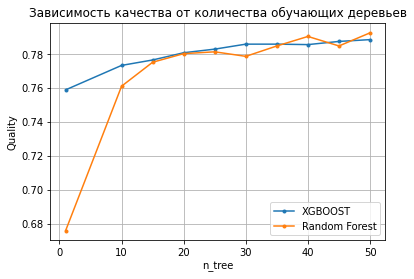

In [10]:
xgb_scoring = np.asmatrix(xgb_scoring)
plt.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='XGBOOST')
plt.plot(n_trees, scoring.mean(axis=1), marker='.', label='Random Forest')
plt.grid()
plt.xlabel('n_tree')
plt.ylabel('Quality')
plt.title('Зависимость качества от количества обучающих деревьев')
plt.legend(loc='lower right')